In [ ]:
pip install geopy


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator=Nominatim(user_agent="my-app")
location=geolocator.geocode("Nagpur")
ngp=(location.latitude,location.longitude)

In [ ]:
from geopy.distance import geodesic

In [ ]:
cities=["Nagpur","Mumbai","Pune","Wardha"]

In [ ]:
city_location=list();

In [ ]:
import numpy as np


In [ ]:
def prim(cities):
  n=len(cities)

  city_location=list();
  for i in cities:
    location=geolocator.geocode(i, timeout=None)
    city_location.append((location.latitude,location.longitude))
  l=[]
  min=0
  for i in range(n):
    d=[]
    for j in range(n):
      a=city_location[i]
      b=city_location[j]
      dist=geodesic(a,b).miles
      if(i==j):
        dist=float("inf")
      d.append(dist)
    #print(d)
    l.append(d)
  #print(l)
  mincost=float("inf")
  min=tuple()

  for i in range(1,n):
    for j in range(i):
      t_d=l[i][j]
      if(t_d<mincost):
        mincost=t_d
        min=(i,j)
  p=min[0]
  q=min[1]
  near=[0]*n
  for i in range(n):
    if(l[p][i]<l[q][i]):
      near[i]=p
    else:
      near[i]=q
  near[p]=near[q]="visited";
  tree=[ [0]*3 for i in range(n-1)]

  tree[0]=[min[0],min[1],mincost]

  for i in range(1,n-1):
    j=0
    tmp=float("inf")
    for k in range(len(near)):
      if(near[k]!="visited" and l[k][near[k]]<tmp):
        j=k
    tree[i][0]=near[j]
    tree[i][1]=j
    tree[i][2]=l[near[j]][j]
    mincost+=l[near[j]][j]
    near[j]="visited"

    for k in range(n):
      if(near[k]!="visited" and l[k][j]<l[k][near[k]]):
        near[k]=j
  return mincost,l,tree

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha'])

(459.89741278599854,
 [[inf, 433.1425428591388, 385.2763086761522, 37.62012241139197],
  [433.1425428591388, inf, 74.08556960975572, 397.34937168175145],
  [385.2763086761522, 74.08556960975572, inf, 348.19172076485086],
  [37.62012241139197, 397.34937168175145, 348.19172076485086, inf]],
 [[3, 0, 37.62012241139197],
  [3, 2, 348.19172076485086],
  [2, 1, 74.08556960975572]])

In [ ]:
same_state=[]
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur','Nashik'])[0])
same_state.append(prim(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Chandrapur','Nashik','Aurangabad'])[0])

In [ ]:
diff_state=[]
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi','Bangalore'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi','Bangalore','Kolkata'])[0])
diff_state.append(prim(['Nagpur', 'Mumbai', 'Chennai', 'Jaipur','Delhi','Bangalore','Kolkata','Hyderabad'])[0])

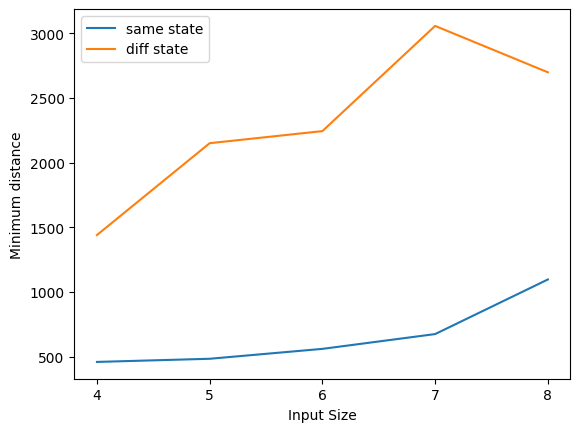

In [ ]:
plt.plot(same_state, label='same state')
plt.plot(diff_state, label='diff state')
plt.xlabel('Input Size')
plt.ylabel('Minimum distance')
plt.xticks([0,1,2,3,4],['4','5','6','7','8'])
plt.legend()
plt.show()

In [ ]:
citites=['Nagpur', 'Mumbai', 'Pune', 'Wardha']

In [ ]:
def draw_graph(cities):
  import networkx as nx
  G = nx.Graph()

  x,y,z=prim(cities)
  n=len(y[0])
  for i in range(1,n):
    for j in range(i):
      G.add_edge(cities[i],cities[j],weight=y[i][j])
  pos = nx.spring_layout(G, seed=n)
  e = [(u, v) for (u, v, d) in G.edges(data=True)]
  nx.draw_networkx_nodes(G, pos, node_size=700)
  nx.draw_networkx_edges(G, pos, edgelist=e, width=4)
  nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


In [ ]:
def draw_mst(cities):
    import networkx as nx
    G_min=nx.Graph()
    x,y,z=prim(cities)
    n=len(y[0])
    for i in z:
      G_min.add_edge(cities[i[0]],cities[i[1]],weight=round(i[2],2))
    pos_min = nx.spring_layout(G_min, seed=4)
    e_min = [(u, v) for (u, v, d) in G_min.edges(data=True)]
    nx.draw_networkx_nodes(G_min, pos_min, node_size=700)
    nx.draw_networkx_edges(G_min, pos_min, edgelist=e_min, width=4)
    nx.draw_networkx_labels(G_min, pos_min, font_size=10, font_family="sans-serif")
    edge_labels_min = nx.get_edge_attributes(G_min, "weight")
    nx.draw_networkx_edge_labels(G_min, pos_min, edge_labels_min)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
def draw(cities):
  draw_graph(cities)
  draw_mst(cities)


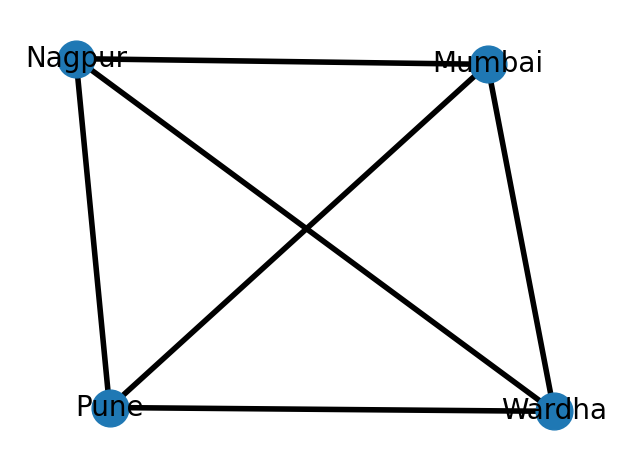

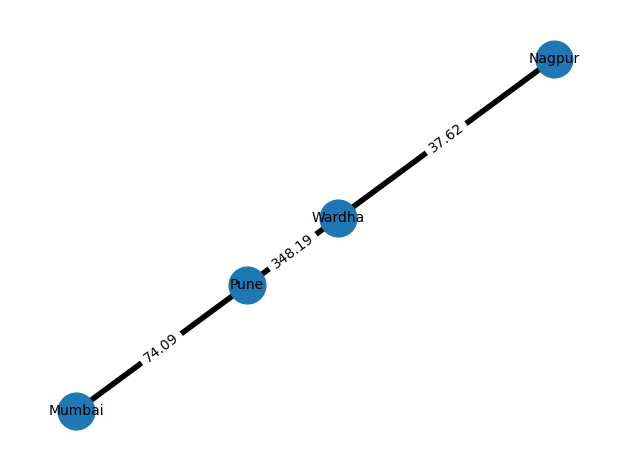

In [ ]:
draw(['Nagpur', 'Mumbai', 'Pune', 'Wardha'])

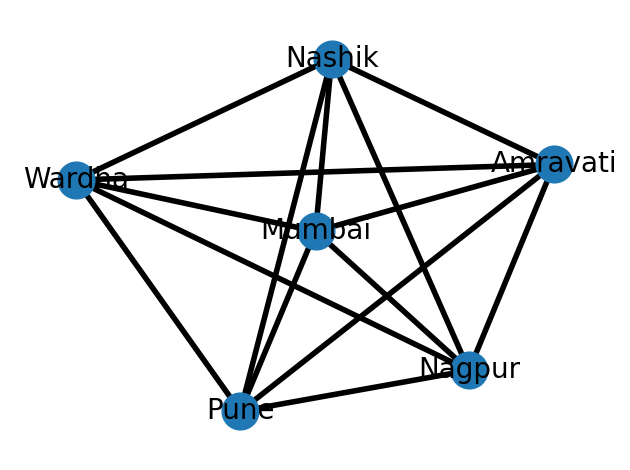

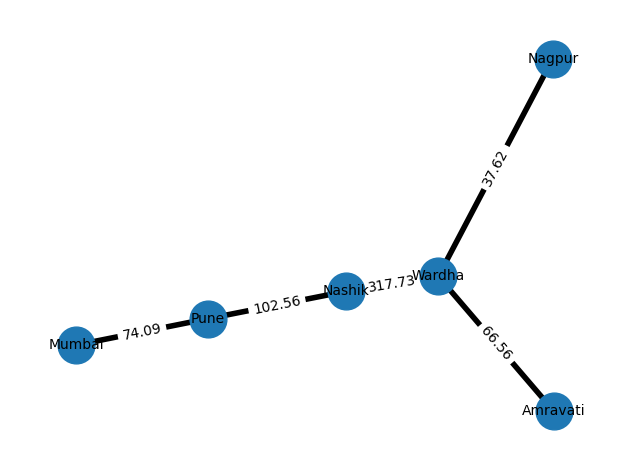

In [ ]:
draw(['Nagpur', 'Mumbai', 'Pune', 'Wardha','Amravati','Nashik'])